In [1]:
import pandas
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

alloc_order = ["ArrayAtomicF", "ArrayAtomicD", "ArrayLockedF", "ArrayLockedD",
               "ArrayAlignedF", "ArrayAlignedD", "TableF", "TableD",
               "ListLocal", "Kernel"]


# Local Benchmarks

## 4K Pages

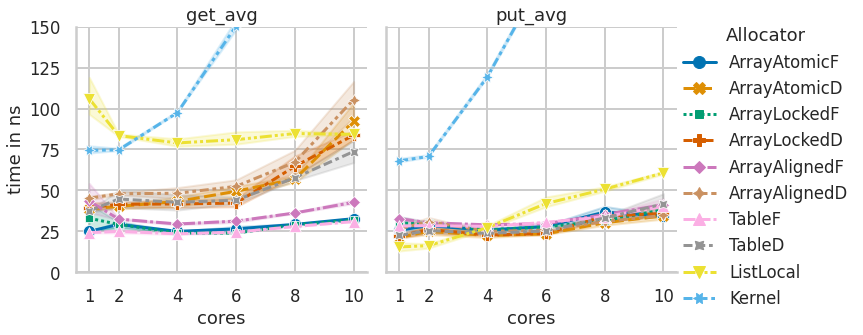

In [21]:
pgd = pandas.concat([
    pandas.read_csv("out/bulk.csv"),
    pandas.read_csv("keep/kernel_bulk.csv"),
])
# print("pages:", pgd["pages"][0])
pgd = pgd[["x", "alloc", "get_avg", "put_avg"]
          ].melt(id_vars=["x", "alloc"], value_vars=["get_avg", "put_avg"], value_name="time")
g = sns.relplot(data=pgd, kind="line", x="x", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylim=(0, 150))
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.legend.set_title("Allocator")


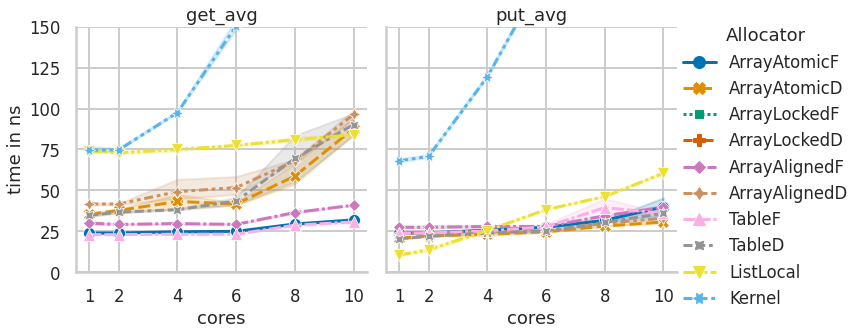

In [2]:
pgd = pandas.concat([
    pandas.read_csv("out/bulk.csv"),
    pandas.read_csv("keep/kernel_bulk.csv"),
])
# print("pages:", pgd["pages"][0])
pgd = pgd[["x", "alloc", "get_avg", "put_avg"]
          ].melt(id_vars=["x", "alloc"], value_vars=["get_avg", "put_avg"], value_name="time")
g = sns.relplot(data=pgd, kind="line", x="x", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylim=(0, 150))
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.legend.set_title("Allocator")


## 2M Pages

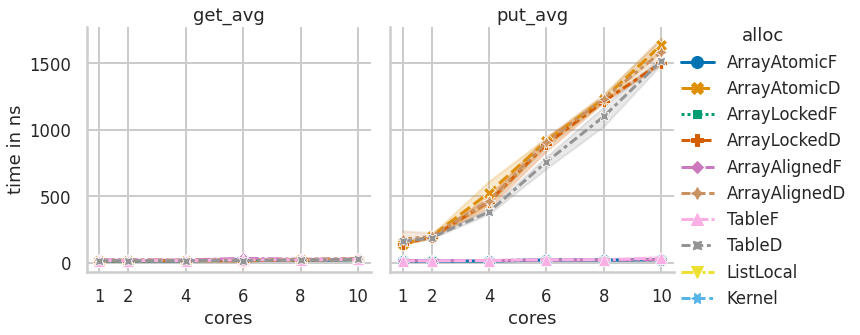

In [13]:
pgd = pandas.read_csv("out/bulk_s1.csv")
# print("allocs:", pgd["pages"][0])
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "get_avg", "put_avg"]
          ].melt(id_vars=["cores", "alloc"], value_vars=["get_avg", "put_avg"], value_name="time")
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
# g.set(ylim=(0, 100))
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


# Server Benchmarks

## Small Pages

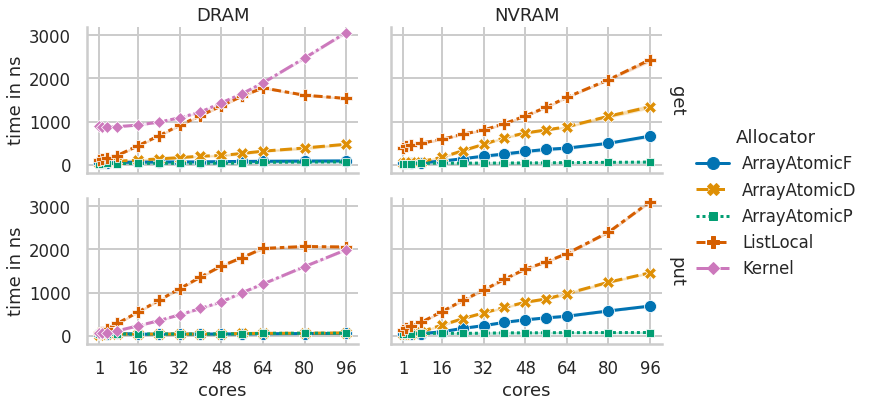

In [9]:
vd = pandas.concat([
    pandas.read_csv("remote/bulk_v.csv"),
    pandas.read_csv("keep/remote/kernel_bulk.csv")
])
vd["mem"] = "DRAM"

pd = pandas.read_csv("remote/bulk_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["ArrayAtomicF", "ArrayAtomicD",
         "ArrayAtomicP", "ListLocal", "Kernel"]
g = sns.FacetGrid(data=pgd, row="variable", col="mem",
                  aspect=1.7, margin_titles=True,
                  hue="alloc", hue_order=order)
g.map_dataframe(sns.lineplot, x="cores", y="time", markers=True,
                hue="alloc", hue_order=order,
                style="alloc", style_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(-200, 3200))
g.set(ylabel="time in ns", xlabel="cores")
g.add_legend(title="Allocator")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.savefig("../../text/thesis/plot/bulk-packed.pdf")


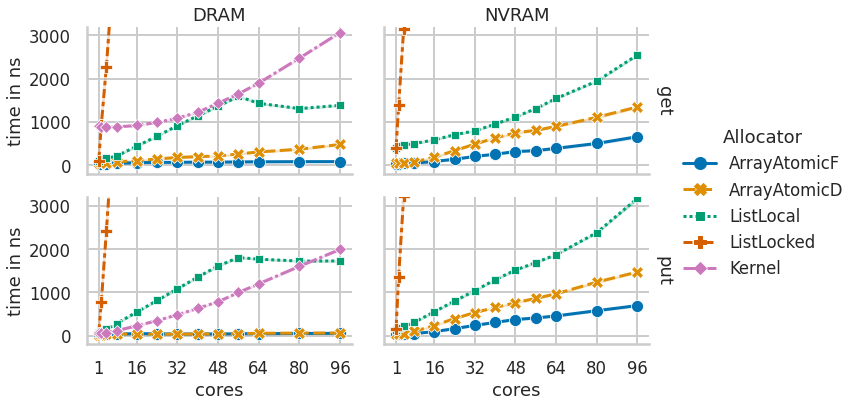

In [62]:
vd = pandas.concat([
    pandas.read_csv("remote/bulk_v.csv"),
    pandas.read_csv("keep/remote/kernel_bulk.csv")
])
vd["mem"] = "DRAM"

pd = pandas.read_csv("remote/bulk_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["ArrayAtomicF", "ArrayAtomicD", "ListLocal", "ListLocked", "Kernel"]
g = sns.FacetGrid(data=pgd, row="variable", col="mem",
                  aspect=1.7, margin_titles=True,
                  hue="alloc", hue_order=order)
g.map_dataframe(sns.lineplot, x="cores", y="time", markers=True,
                hue="alloc", hue_order=order,
                style="alloc", style_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(-200, 3200))
g.set(ylabel="time in ns", xlabel="cores")
g.add_legend(title="Allocator")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.savefig("../../text/thesis/plot/bulk.pdf")


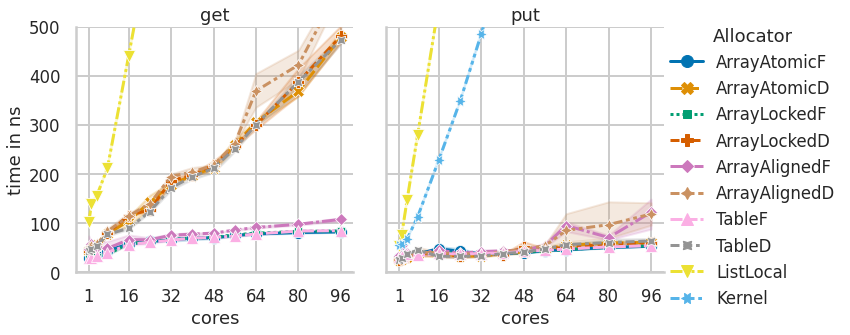

In [11]:
pgd = pandas.concat([
    pandas.read_csv("remote/bulk_v.csv"),
    pandas.read_csv("keep/remote/kernel_bulk.csv")
])
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 500))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.savefig("../../text/thesis/plot/bulk-dram.pdf")


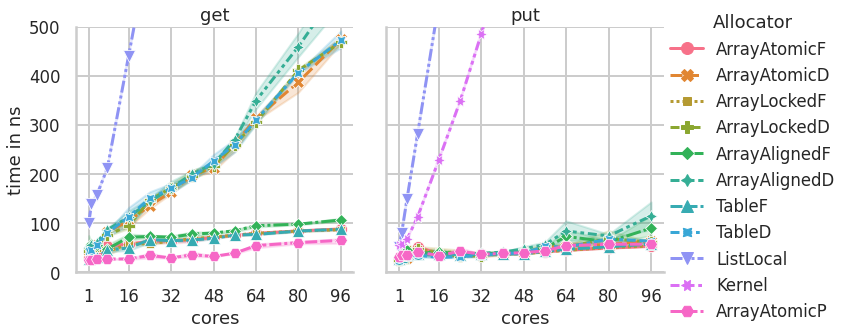

In [7]:
pgd = pandas.concat([
    pandas.read_csv("remote/bulk_v.csv"),
    pandas.read_csv("keep/remote/kernel_bulk.csv")
])
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = alloc_order + ["ArrayAtomicP"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 500))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


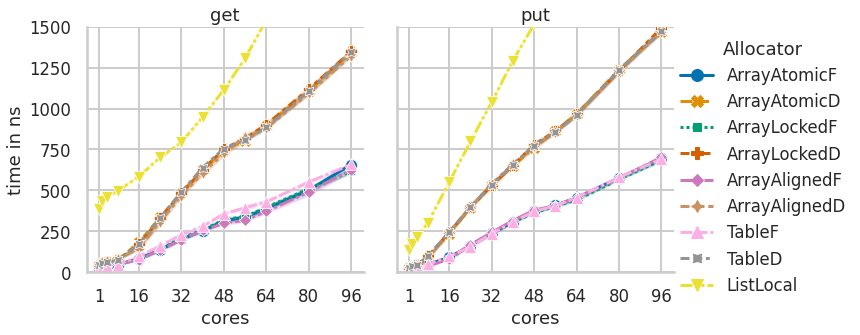

In [12]:
pgd = pandas.read_csv("remote/bulk_p.csv")
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = alloc_order[:-1]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 1500))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.savefig("../../text/thesis/plot/bulk-nvram.pdf")


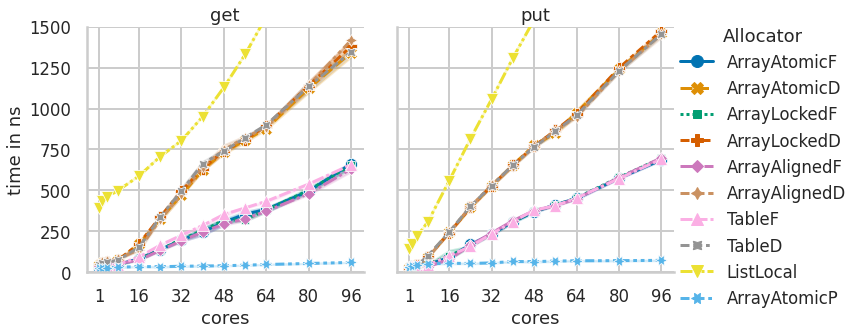

In [10]:
pgd = pandas.read_csv("remote/bulk_p.csv")
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = alloc_order[:-1] + ["ArrayAtomicP"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 1500))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


## Huge Pages

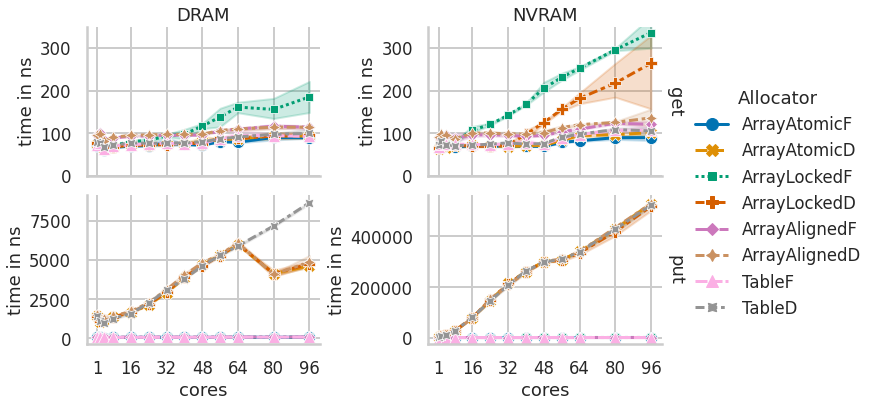

In [77]:
vd = pandas.concat([
    pandas.read_csv("remote/bulk_v1.csv"),
    # pandas.read_csv("keep/remote/kernel_bulk.csv")
])
vd["mem"] = "DRAM"

pd = pandas.read_csv("remote/bulk_p1.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["get", "put"], value_name="time")
    
order = alloc_order[:-2]
g = sns.FacetGrid(data=pgd, row="variable", col="mem", sharey=False,
                  aspect=1.7, margin_titles=True,
                  hue="alloc", hue_order=order)
g.map_dataframe(sns.lineplot, x="cores", y="time", markers=True,
                hue="alloc", hue_order=order, 
                style="alloc", style_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylabel="time in ns", xlabel="cores")
g.add_legend(title="Allocator")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.axes_dict[("get", "DRAM")].set_ylim((0, 350))
g.axes_dict[("get", "NVRAM")].set_ylim((0, 350))
g.savefig("../../text/thesis/plot/bulk1.pdf")


## Giant Pages

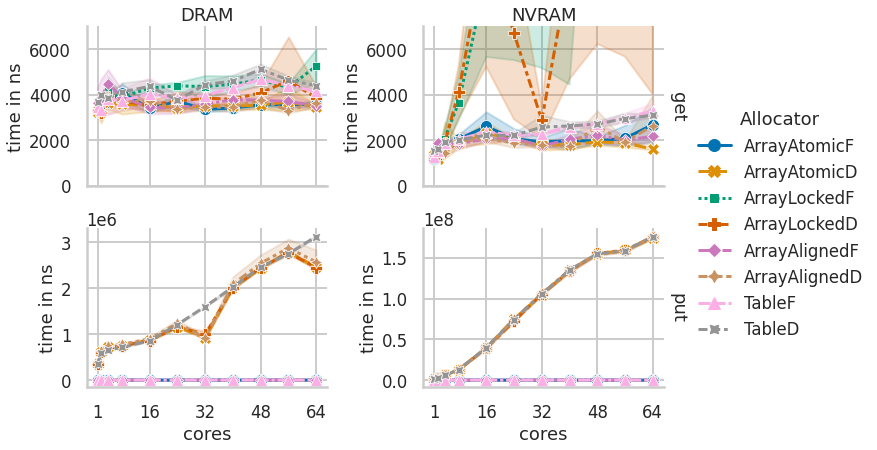

In [79]:
vd = pandas.concat([
    pandas.read_csv("remote/bulk_v2.csv"),
    # pandas.read_csv("keep/remote/kernel_bulk.csv")
])
vd["mem"] = "DRAM"

pd = pandas.read_csv("remote/bulk_p2.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["get", "put"], value_name="time")

order = alloc_order[:-2]
g = sns.FacetGrid(data=pgd, row="variable", col="mem", sharey=False,
                  aspect=1.55, height=3.3, margin_titles=True,
                  hue="alloc", hue_order=order)
g.map_dataframe(sns.lineplot, x="cores", y="time", markers=True,
                hue="alloc", hue_order=order,
                style="alloc", style_order=order)
g.set(xticks=[1, 16, 32, 48, 64])
g.set(ylabel="time in ns", xlabel="cores")
g.add_legend(title="Allocator")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.axes_dict[("get", "DRAM")].set_ylim((0, 7000))
g.axes_dict[("get", "NVRAM")].set_ylim((0, 7000))
g.figure.subplots_adjust(wspace=0.4)
g.savefig("../../text/thesis/plot/bulk2.pdf")
